In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

#### Cleaning the Data

In [2]:
# Importing data
df = pd.read_csv('movies.csv')

# Checking data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# Any missing data?
for col in df.columns:
    missing_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_pct))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# How many?
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Data types?
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Cleaning the data while preserving integrity, how do I remove the NULLS with appropriate data?
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [7]:
# In the ratings column, there were some movies listed as 'Not Rated'
# I will use that same rating to replace the NULL values in the rating column.
df['rating'] = df['rating'].fillna('Not Rated')

# Doublecheck
df['rating'].isnull().sum()

0

In [8]:
# 4 NULLs in runtime out of nearly 8000 movies.
df['runtime'].isnull().sum()
# This is a very small amount, and can safely be filled with the mean runtime of movies and not skew
# the results we are looking for.
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
df['runtime'].isnull().sum()

0

In [9]:
# The same can be done to the votes and score NULLs because of the miniscule amount present (0.0004% of the whole dataset)
df['score'] = df['score'].fillna(df['score'].mean())
df['votes'] = df['votes'].fillna(df['votes'].mean())

# Doublecheck
print(df['score'].isnull().sum())
print(df['votes'].isnull().sum())

0
0


In [10]:
# Four columns cleared of NULLs
# Which rows in released, writer, star, country are NULL?
# Let's separate them to explore more easily.
df_null = df[df.isna().any(axis=1)]

In [11]:
# A df for the rows with null values to work down and explore quickly.
# Country can likely be easily filled in with the Mode, however, we can see what the movies are as well.
df_null[df_null['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [12]:
# NULL value movies can be replaced by Mode, however, looking at the movies themselves,
# I also know that they are made in the United States, so the solution is valid.
df['country'].value_counts().head()

United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Name: country, dtype: int64

In [13]:
# Let's fill it in.
df['country'] = df['country'].fillna(df['country'].mode()[0])
print(df['country'].isnull().sum())
# The number movies listed under United States increased by 3, the amount we added by correcting the NULLs
df['country'].value_counts().head()

0


United States     5478
United Kingdom     816
France             279
Canada             190
Germany            117
Name: country, dtype: int64

In [14]:
# Now, what have we left?
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       2
score          0
votes          0
director       0
writer         3
star           1
country        0
budget      2171
gross        189
company       17
runtime        0
dtype: int64

In [15]:
# Let's get rid of the released NULLs.
df[df['released'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,United States,NaN,NaN,NaN,107.261613
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,United States,NaN,NaN,NaN,107.261613


In [16]:
# I have found the released dates for these two movies, and will input them into those cells.
df.at[5728, 'released'] = 'October 29, 2010 (United States)'
df.at[5730, 'released'] = 'February 12, 2010 (United States)'

# Doublecheck
print(df['released'].isnull().sum())

0


In [17]:
# Let's take care of star next.
df[df['star'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,Not Rated,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [18]:
# Quick check online shows that Tom Logan was the Director, Writer, and Star of this movie.
df.at[474, 'star'] = 'Tom Logan'
df['star'].isnull().sum()

0

In [19]:
# Let's take care of the writers now.
df[df['writer'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Unrated,Drama,1990,1990 (United States),6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2010,"April 24, 2011 (Greece)",7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [20]:
# The data was acquired through scrapping of IMDB, and the areas that are NULL can sometimes be easily searched for online from the source.
# Derek Jarman was both Director and Writer of The Garden, and the other writers were found from the source website to maintain integrity.
# If I were trying to be quick about things, I would likely have dropped all the rows that had NULLs outside of Budget because it accounted for about 1% of the data, not enough to skew results in any way.
df.at[1820, 'writer'] = 'Derek Jarman'
df.at[5834, 'writer'] = 'Michael Winterbottom'
df.at[7655, 'writer'] = 'Xie Xiying'
df['writer'].isnull().sum()

0

In [21]:
# And company now...
print(df['company'].unique())
df['company'].value_counts().head(10)

['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ... 'Dow Jazz Films'
 'Embi Productions' 'PK 65 Films']


Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: company, dtype: int64

In [22]:
# Replace with the mode for now. A large chunk of movies are produced by the top 10 studios worldwide in this dataset.
# I want to figure out a different way to deal with this. Debating just removal of the rows. Will try Mode for now.
df['company'] = df['company'].fillna(df['company'].mode()[0])
df['company'].isnull().sum()

0

In [23]:
# How have we progressed?
# Only Budget and Gross is left, but budget makes a large amount of the nulls. What do we do here?
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2171
gross        189
company        0
runtime        0
dtype: int64

In [24]:
# Checking for ideas...
print('Mean budget', df['budget'].mean())
print('Median Budget', df['budget'].median())
print('Mode Budget', df['budget'].mode())

# It seems like it might be best for now to fill in both budget and gross NULLs with 0s for now.
# Multiple Imputations could be done in the future, as these movies seem to be mainly older movies where such data might
# have been lost or unrecorded.
df['budget'].fillna(0, inplace = True)
df['gross'].fillna(0, inplace = True)

Mean budget 35589876.192650534
Median Budget 20500000.0
Mode Budget 0    20000000.0
dtype: float64


In [25]:
# And now...
# NO NULLS!
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [26]:
# Changing datatypes into a more usable format for future work.
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['score'] = df['score'].astype('float64')
df['votes'] = df['votes'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [27]:
# Dropping duplicates.
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [28]:
# Let's also sort this out by a value to keep it organized.
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


#### Exploratory Analysis

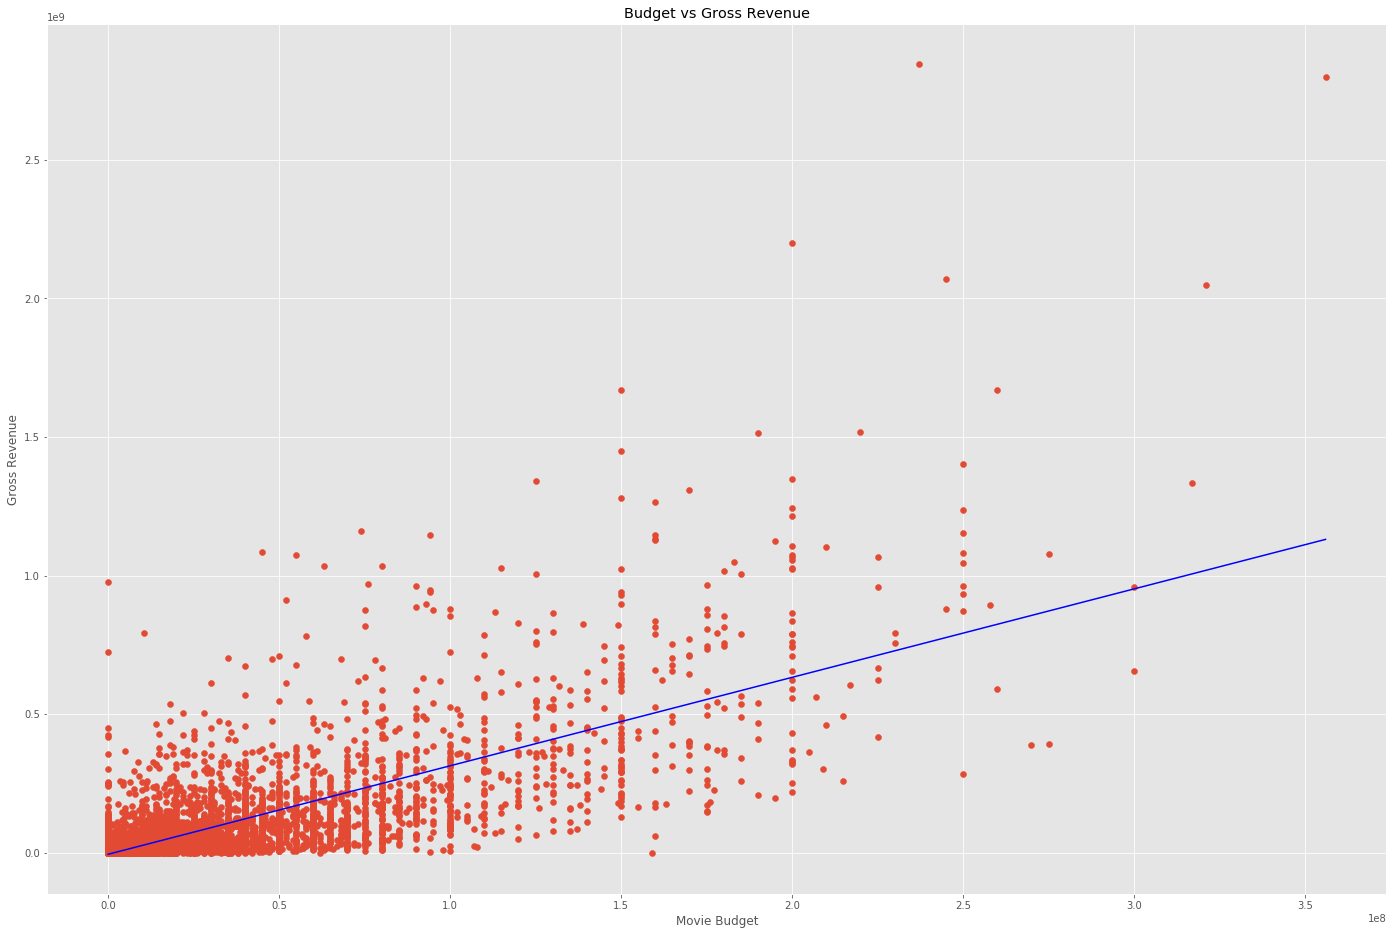

In [29]:
plt.figure(figsize = (24,16))
plt.scatter(x = df['budget'], y = df['gross'])
plt.plot(np.unique(df['budget']), np.poly1d(np.polyfit(df['budget'], df['gross'], 1))(np.unique(df['budget'])), color = 'blue')
plt.title('Budget vs Gross Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [30]:
# How does the correlation look between numerical columns?
# Default .corr() uses the Pearson method, there is also a Kendall and Spearman methods to determine correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.309212,0.261900,0.120758
score,0.097936,1.000000,0.409182,0.055661,0.186384,0.399335
votes,0.222810,0.409182,1.000000,0.486821,0.632807,0.309168
budget,0.309212,0.055661,0.486821,1.000000,0.750157,0.269488
gross,0.261900,0.186384,0.632807,0.750157,1.000000,0.245226
runtime,0.120758,0.399335,0.309168,0.269488,0.245226,1.000000


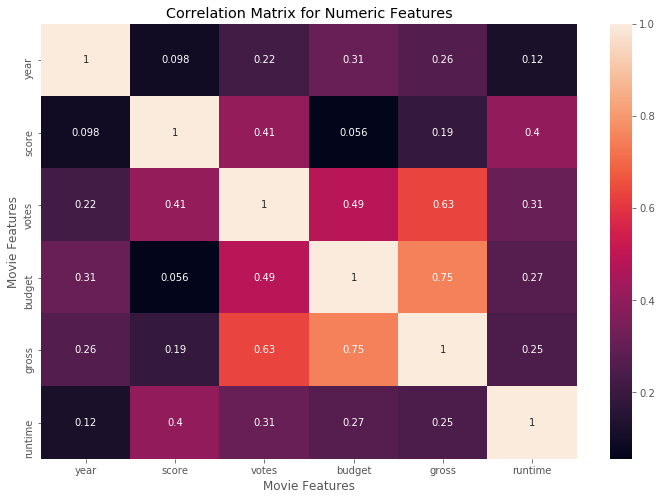

In [31]:
# Heatmap for better visualization.
correlation_matrix = df.corr(method = 'pearson')
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [32]:
# Need to numerize the df so that I can get the correlation between columns that were originally not numeric.
# This way, I can glean the correlation between companies, stars, and writers with how well a movie performed or was received.
df_numerized = df

# For each column in the dataframe, if the type is object, change it into category.
# Earlier I determined their datatypes during cleaning.
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # This gives it the category number.
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274,117,82,2798,55,0,0,1159,92
1614,1745,6,10,1989,55,5.2,1300,1033,1743,166,54,0,0,146,85
1606,2691,6,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2237,89
1601,3836,3,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104


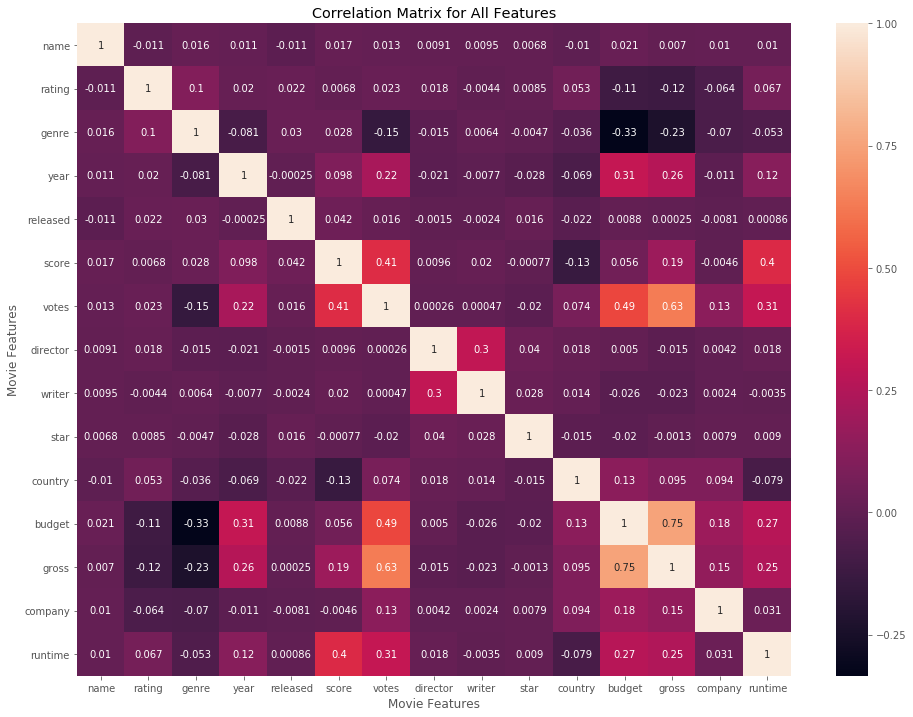

In [33]:
# Heatmap for better visualization for every single field in the data.
correlation_matrix = df_numerized.corr(method = 'pearson')
plt.figure(figsize = (16,12))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
# Organize to quickly know the most correlated features.
correlation_matrix = df_numerized.corr()
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs.sort_values()
high_correlation = correlation_pairs[(correlation_pairs) > 0.5]
high_correlation

gross     votes       0.632807
votes     gross       0.632807
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [35]:
# Budget and Votes have the highest correlation with gross earnings of a movie.